1. Load Dataset

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Load Dataset
df = pd.read_csv("student-mat.csv",delimiter=';')

In [20]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


2. Explore & Clean Data

In [21]:
# Check for missing values
df_clean = df.drop_duplicates().reset_index(drop=True)
print('Shape after removing duplicates:', df_clean.shape)

Shape after removing duplicates: (395, 33)


In [22]:
# Remove duplicates
df_original_shape = df.shape
df = df.drop_duplicates()
duplicates_removed = df_original_shape[0] - df.shape[0]
print(f"Number of duplicates removed: {duplicates_removed}")

Number of duplicates removed: 0


In [23]:
# Inspect dataset shape & dtypes
print(f"Final Shape: {df.shape}")
print("Data Types:")
df.info(verbose=False, memory_usage=False)

Final Shape: (395, 33)
Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Columns: 33 entries, school to G3
dtypes: int64(16), object(17)

3. Analysis Question

In [24]:
# Average final grade (G3)
avg_g3 = df['G3'].mean()
print(f"a. Average final grade (G3): {avg_g3:.2f}")

a. Average final grade (G3): 10.42


In [25]:
# How many students scored above 15?
students_above_15 = (df['G3'] > 15).sum()
print(f"b. Students scored above 15: {students_above_15}")

b. Students scored above 15: 40


In [26]:
# Which gender performs better on average?
gender_avg_g3 = df.groupby('sex')['G3'].mean().sort_values(ascending=False)
print("d. Average G3 by Gender:")
print(gender_avg_g3.to_markdown(numalign="left", stralign="left"))

d. Average G3 by Gender:
| sex   | G3      |
|:------|:--------|
| M     | 10.9144 |
| F     | 9.96635 |


4. Visualizations

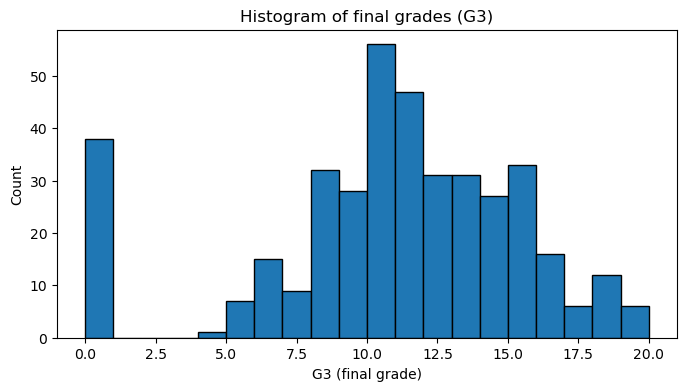

In [27]:
#Histogram of grades (G3)
plt.figure(figsize=(8,4))
plt.hist(df_clean['G3'], bins=range(0,21), edgecolor='black')
plt.title('Histogram of final grades (G3)')
plt.xlabel('G3 (final grade)')
plt.ylabel('Count')
plt.show()

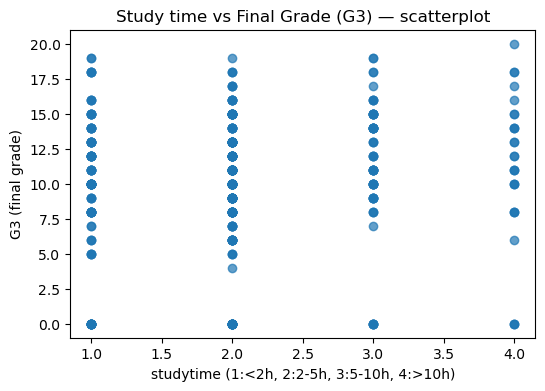

In [28]:
# Scatterplot: study time vs grades
plt.figure(figsize=(6,4))
plt.scatter(df_clean['studytime'], df_clean['G3'], alpha=0.7)
plt.title('Study time vs Final Grade (G3) — scatterplot')
plt.xlabel('studytime (1:<2h, 2:2-5h, 3:5-10h, 4:>10h)')
plt.ylabel('G3 (final grade)')
plt.show()

C:\Users\vscha\AppData\Local\Temp\ipykernel_24840\3626959747.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_avg_g3.index, y=gender_avg_g3.values, palette='coolwarm')


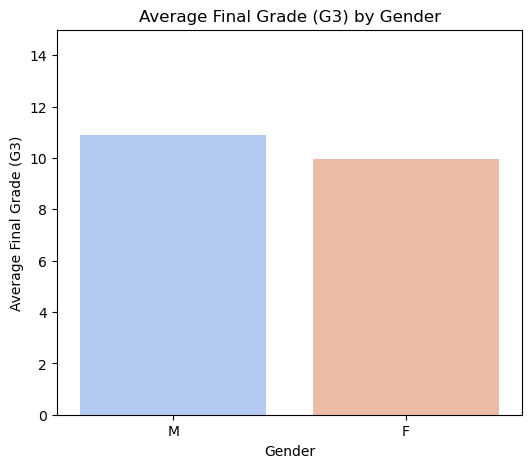

In [30]:
#Bar chart: male vs female average score
plt.figure(figsize=(6, 5))
sns.barplot(x=gender_avg_g3.index, y=gender_avg_g3.values, palette='coolwarm')
plt.title('Average Final Grade (G3) by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Final Grade (G3)')
plt.ylim(0, 15)
plt.show()